In [1]:
# retina
%config InlineBackend.figure_format = 'retina'

In [2]:
%load_ext autoreload
%autoreload 2

In [11]:
import os
from pathlib import Path
import pickle
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.table import Table
import eazy

from matplotlib import rcParams
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 25

WD = Path('/data1/hbahk/spherex-photoz/spherex-challenge/challenge')
OUTDIR = WD / 'output_combined'
os.chdir(WD)

from utils import plot_comp_hexbin

In [144]:
cat = Table.read(WD/'data/L3_COSMOS2020_Richard_2023DEC4_SPHEREx_fiducial102_more.fits')
cat_reduced = cat['source_id', 'x', 'y', 'HSC_i_MAG', 'z_true', 'FLAG_ML']
cat_reduced.write(WD/'data/fiducial102_reduced.fits', overwrite=True)

In [145]:
# make the master output table
base = Table.read(WD/'data/fiducial102_reduced.fits')

base['z_true'] = base['z_true'][:,0]
base['HSC_i_MAG'] = base['HSC_i_MAG'][:,0]

base[:5]

<Table length=5>
source_id    x       y        HSC_i_MAG       z_true FLAG_ML
  int64   float64 float64      float64       float64 float64
--------- ------- ------- ------------------ ------- -------
   180642     0.0     0.0 23.561245805944896  0.7599     0.0
   180650     0.0     0.0 22.238483110379896  0.7945     0.0
   180651     0.0     0.0 24.799673329369853  0.8346     0.0
   180654     0.0     0.0 24.236406897361483  1.3229     1.0
   180657     0.0     0.0 24.744050892069353  2.5462     1.0

In [146]:
output1 = Table.read(OUTDIR/'output16.fits')
output1[:5]

<Table length=5>
  id    z_spec ...                  ABSM_274                 
               ...                                           
int64  float64 ...                 float64[5]                
------ ------- ... ------------------------------------------
382728  2.5891 ...                    -- .. -18.7497998871574
382733  0.3476 ... -17.245618836757785 .. -20.647399918911105
382741  0.7581 ...                   -- .. -19.82214623722529
382746  0.8049 ...                  -- .. -14.425025820574028
382749  1.0188 ...                  -- .. -17.325196374896635

In [147]:
colnames = ['z_phot', 'z_phot_chi2', 'z160', 'z840', 'id']
for label in colnames:
    base[label] = np.empty(len(base), dtype=float)

for i in range(17):
    start_id = i*10000
    end_id = (i+1)*10000 if i < 16 else len(base)
    
    outtab = Table.read(OUTDIR/f'output{i:02d}.fits')
    for label in colnames:
        base[label][start_id:end_id] = outtab[label]

In [148]:
base.write(OUTDIR/'result.fits', overwrite=True)

In [5]:
base = Table.read(OUTDIR/'result.fits')

Objects : 163902
Outliers: 109246




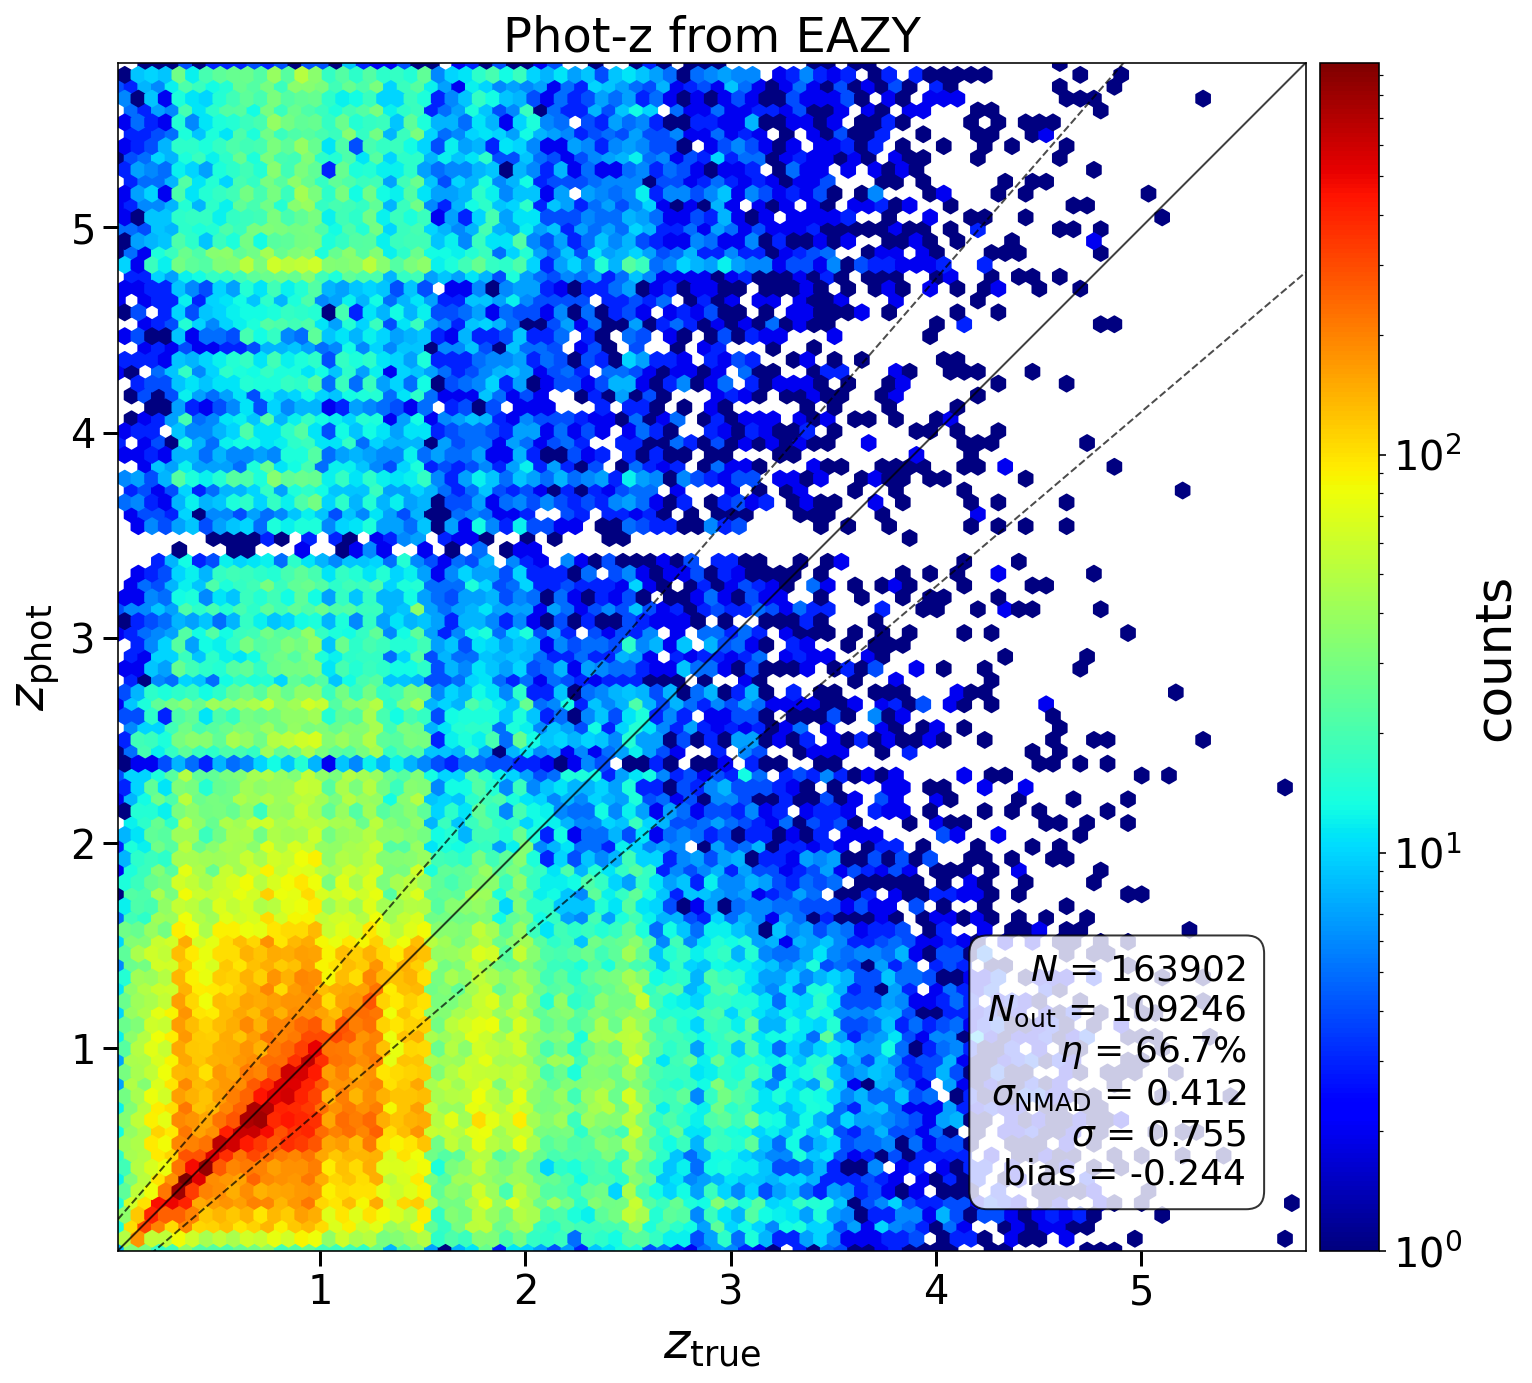

In [36]:
id_out = plot_comp_hexbin(base['z_true'], base['z_phot'], base['z_phot_chi2'],
                          'Fig1-comp_z_eazypy.png', base['id'],
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title="Phot-z from EAZY", xmin=0.015, xmax=5.8, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False,
                          color_log_scale=True)

Objects : 163902
Outliers: 109246




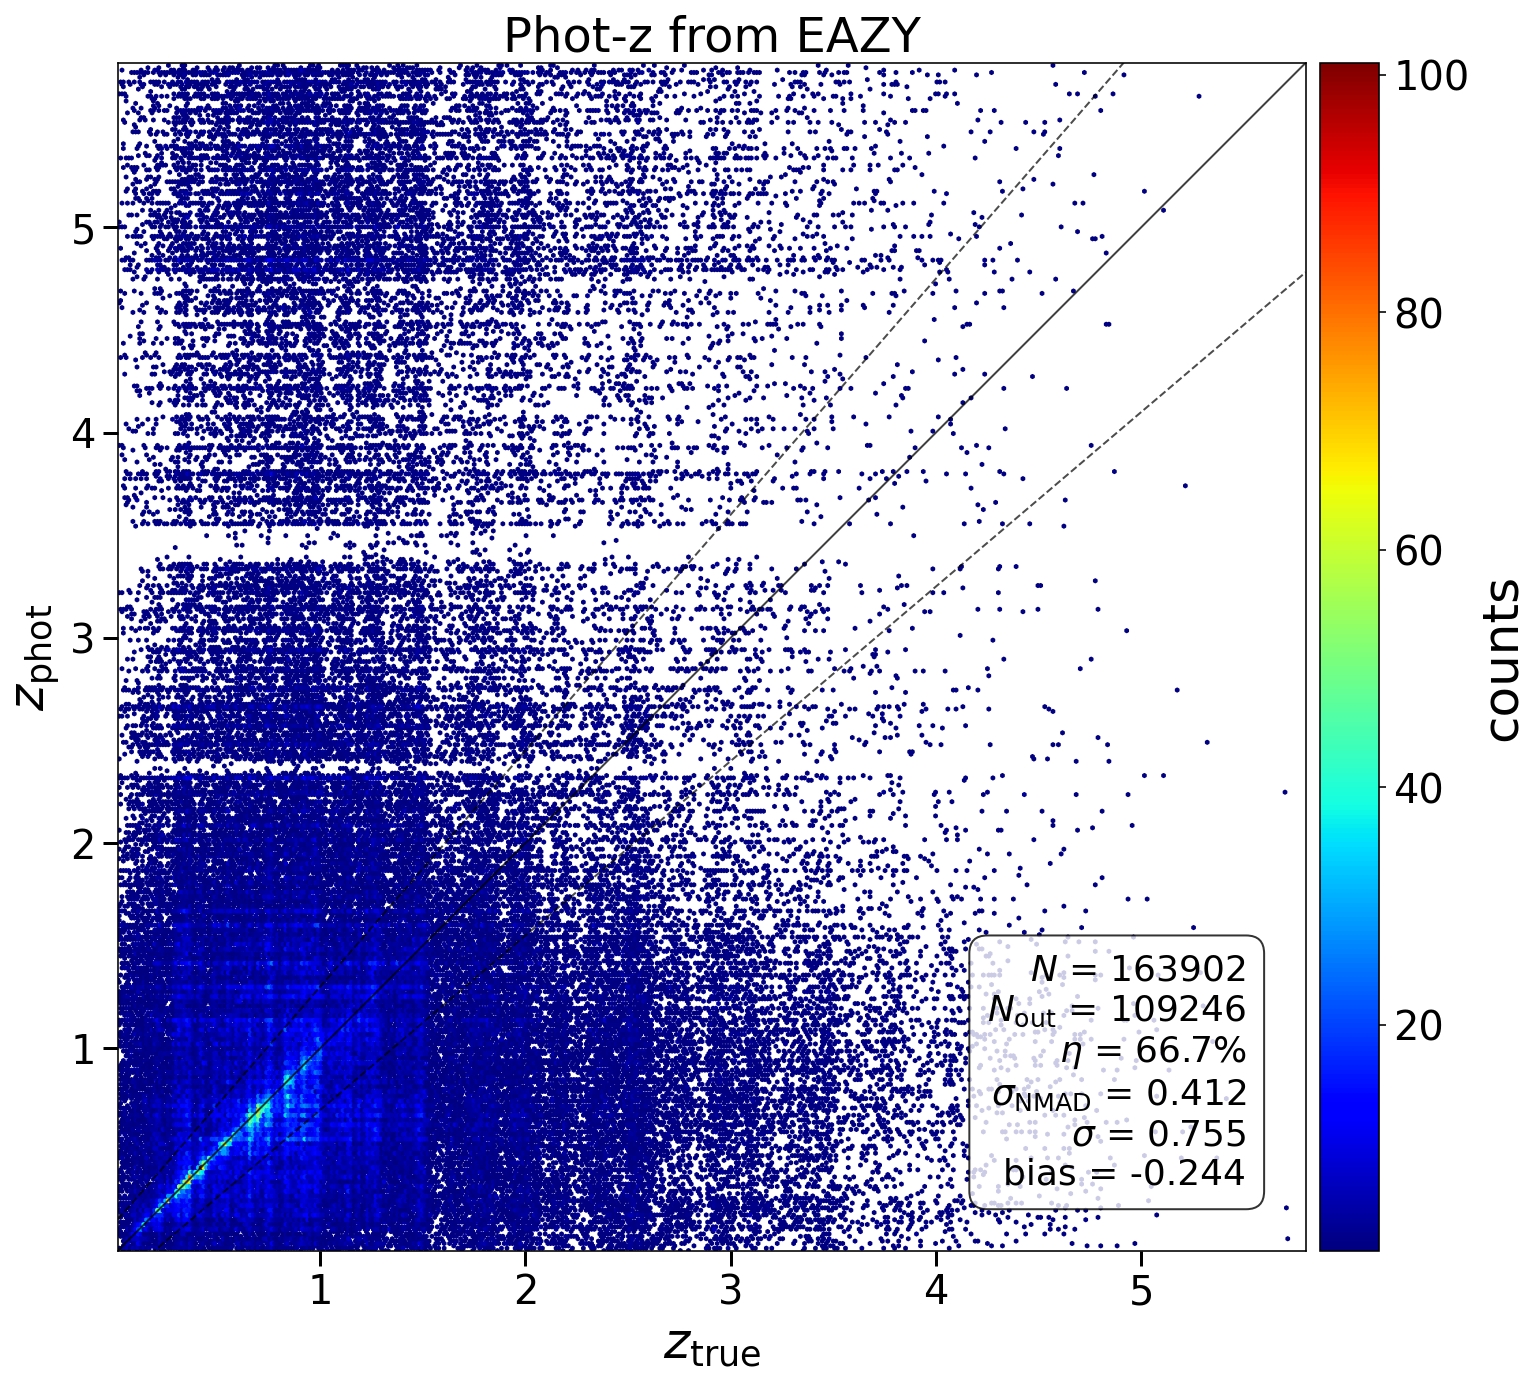

In [32]:
id_out = plot_comp_hexbin(base['z_true'], base['z_phot'], base['z_phot_chi2'],
                          'Fig1-comp_z_eazypy.png', base['id'],
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title="Phot-z from EAZY", xmin=0.015, xmax=5.8, cmap='jet',
                          scatter_plot=False, gridsize=(87*5,50*5), log_scale=False,
                          color_log_scale=False)

Objects : 367
Outliers: 0




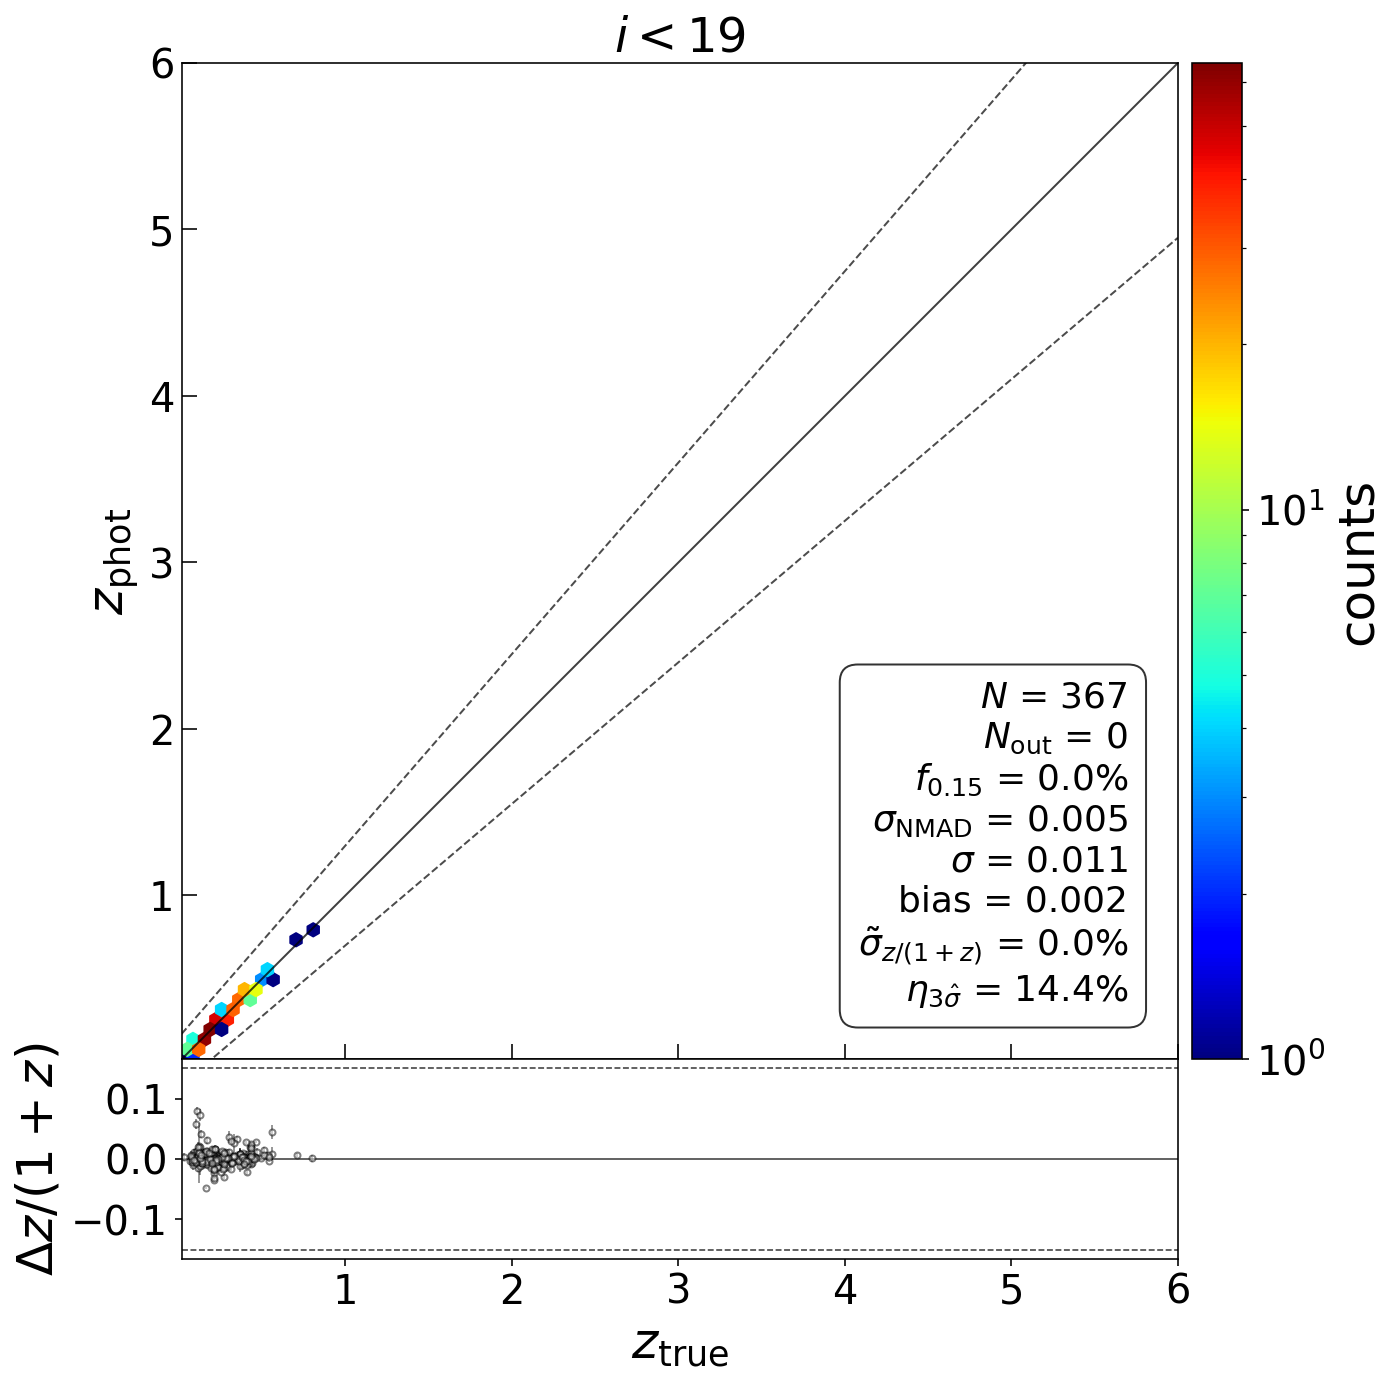

In [65]:
imask = base['HSC_i_MAG'] < 19

# id_out = plot_comp_hexbin(base['z_true'][imask], base['z_phot'][imask],
#                           base['z_phot_chi2'][imask],
#                           'Fig1-comp_z_eazypy.png', base['id'][imask],
#                           label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
#                           title="$i<19$", xmin=0.015, xmax=5.8, cmap='jet',
#                           scatter_plot=False, gridsize=(87,50), log_scale=False)
id_out = plot_comp_hexbin(base['z_true'][imask], base['z_phot'][imask],
                          base['z_phot_chi2'][imask],
                          'Fig1-comp_z_eazypy.png', base['id'][imask],
                          z_160=base['z160'][imask], z_840=base['z840'][imask],
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title="$i<19$", xmin=0.015, xmax=6, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False,
                          residual_plot=True)

Objects : 1263
Outliers: 0




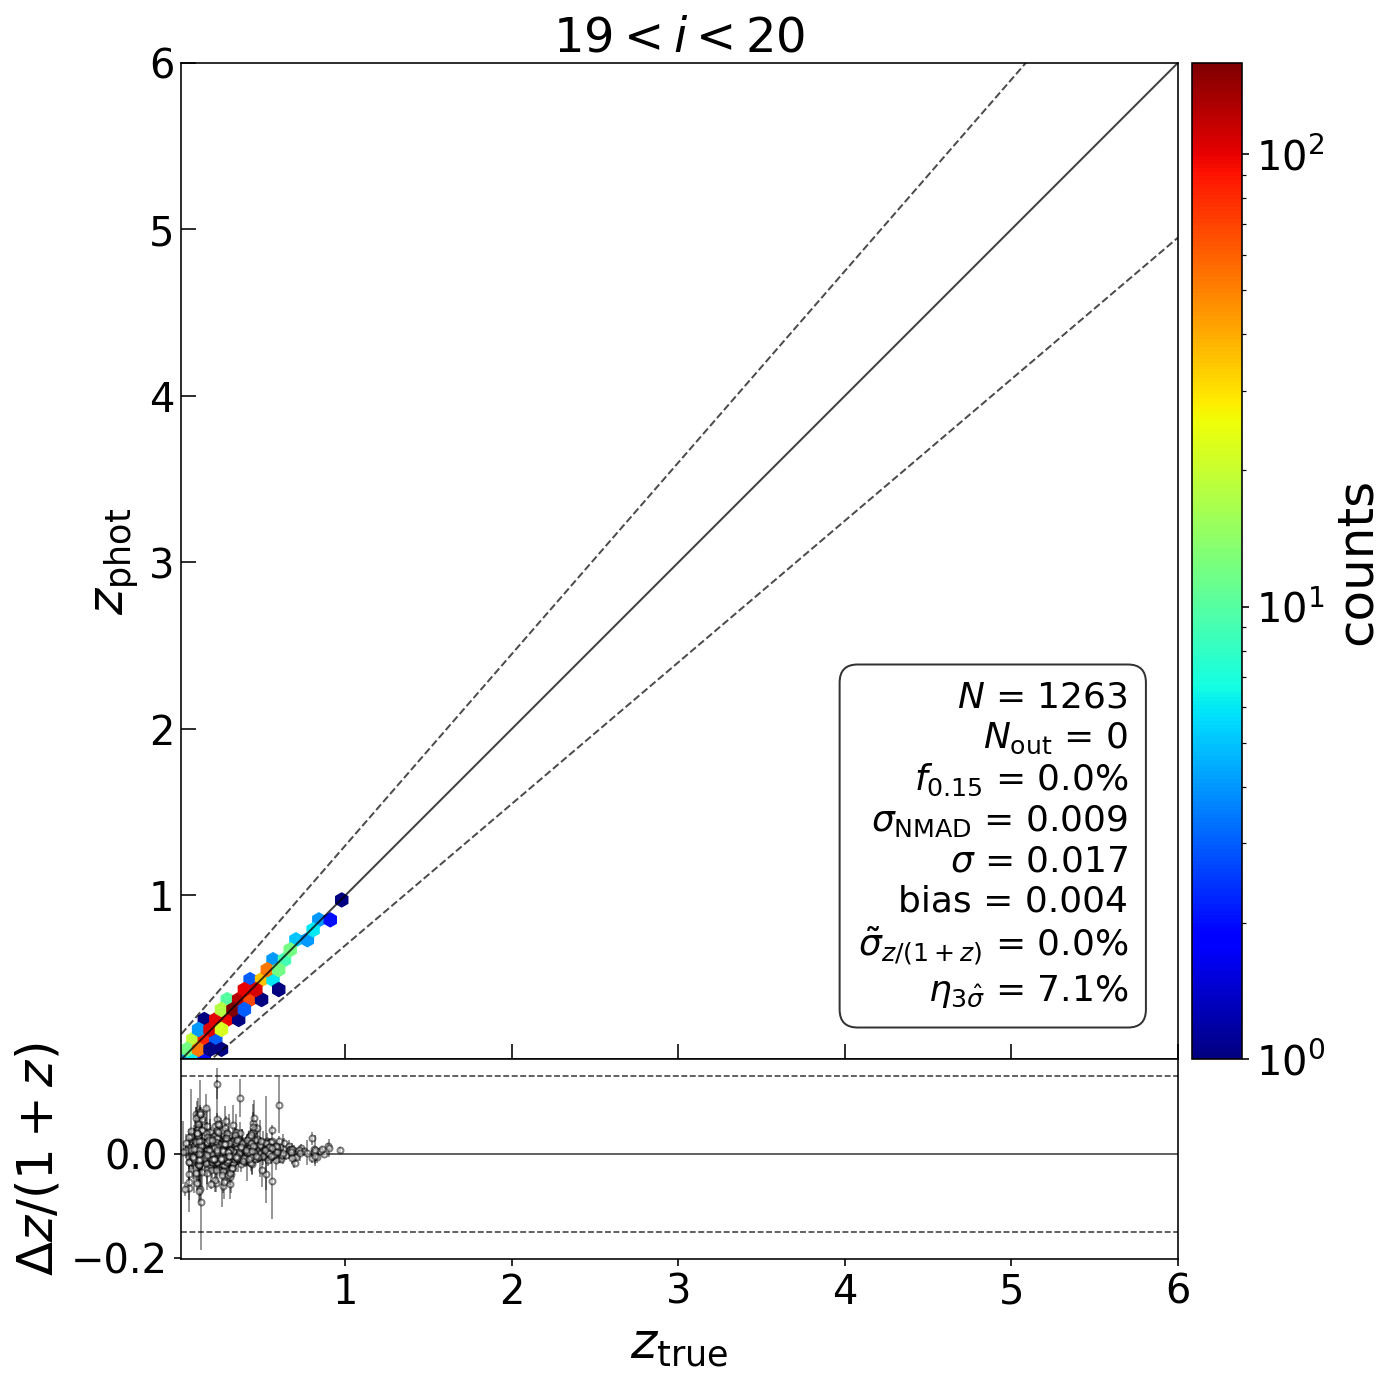

In [64]:
imask = (base['HSC_i_MAG'] > 19) & (base['HSC_i_MAG'] < 20)

id_out = plot_comp_hexbin(base['z_true'][imask], base['z_phot'][imask],
                          base['z_phot_chi2'][imask],
                          'Fig1-comp_z_eazypy.png', base['id'][imask],
                          z_160=base['z160'][imask], z_840=base['z840'][imask],
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title="$19<i<20$", xmin=0.015, xmax=6, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False,
                          residual_plot=True)

Objects : 3552
Outliers: 67




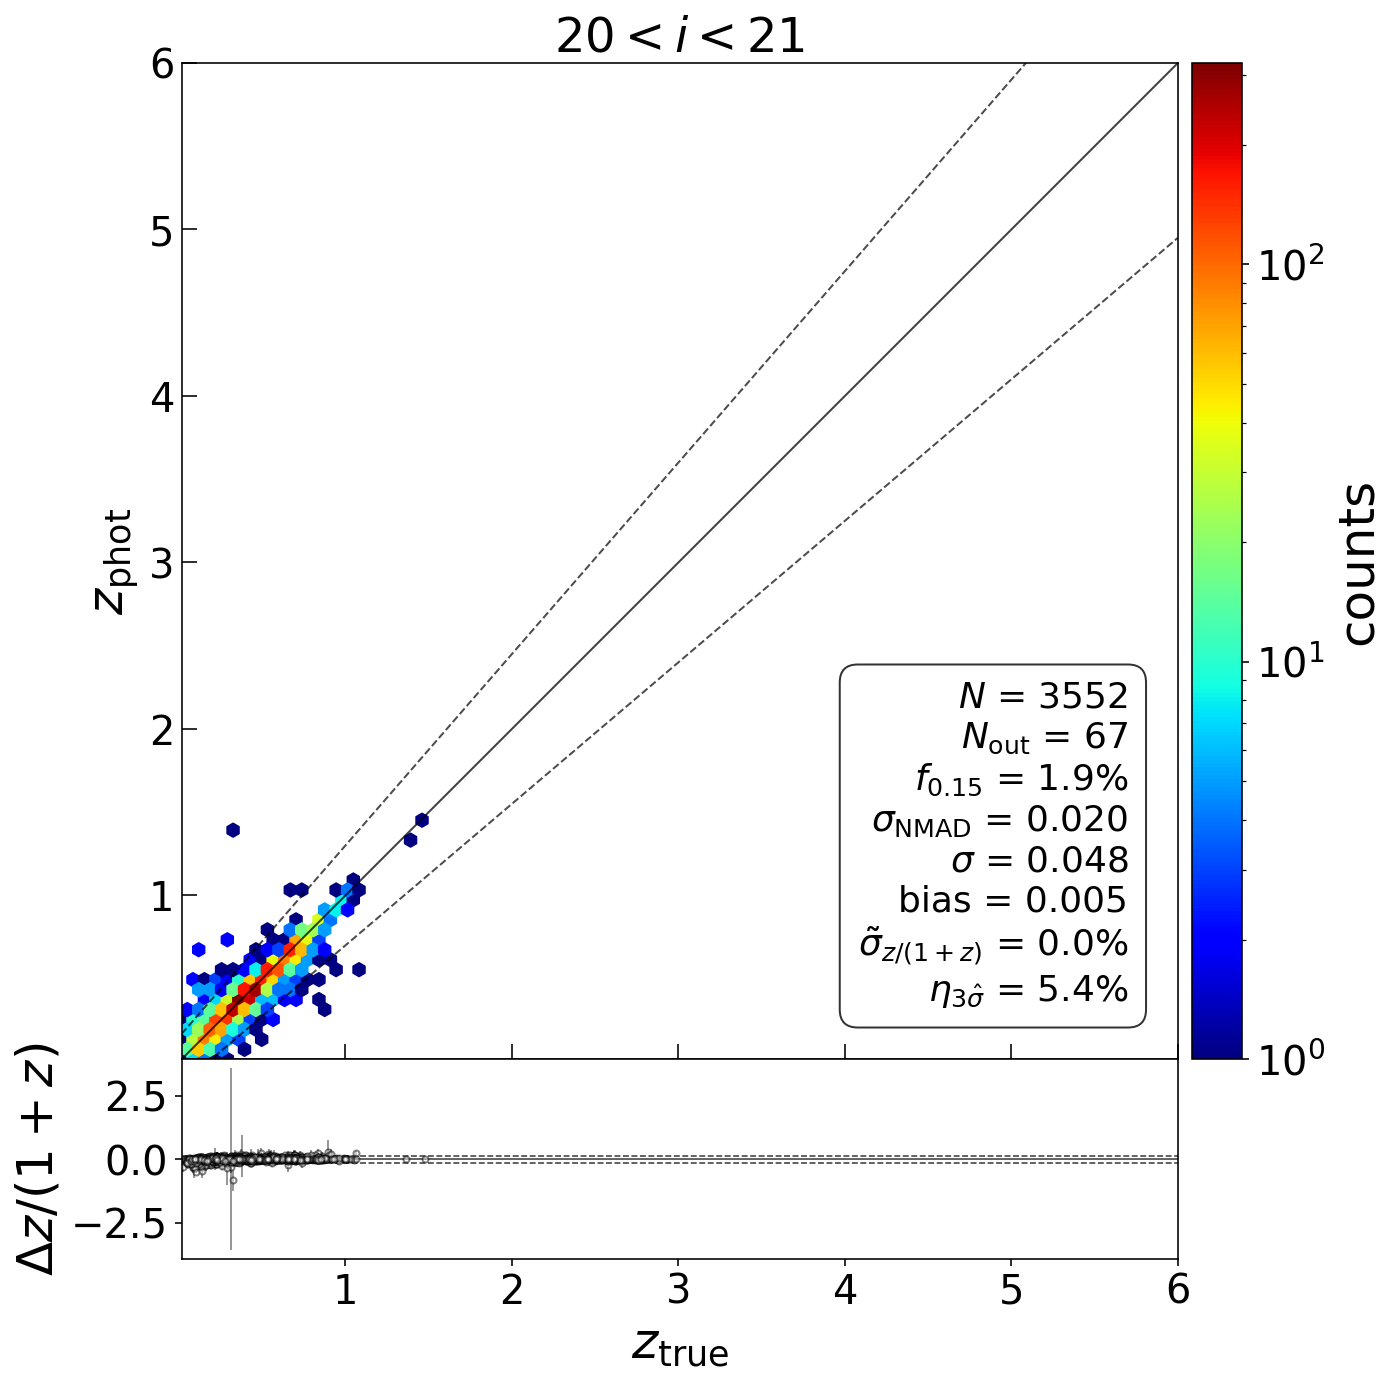

In [66]:
imask = (base['HSC_i_MAG'] > 20) & (base['HSC_i_MAG'] < 21)

# id_out = plot_comp_hexbin(base['z_true'][imask], base['z_phot'][imask],
#                           base['z_phot_chi2'][imask],
#                           'Fig1-comp_z_eazypy.png', base['id'][imask],
#                           label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
#                           title="$20<i<21$", xmin=0.015, xmax=5.8, cmap='jet',
#                           scatter_plot=False, gridsize=(87*5,50*5), log_scale=False,
#                           color_log_scale=True)
id_out = plot_comp_hexbin(base['z_true'][imask], base['z_phot'][imask],
                          base['z_phot_chi2'][imask],
                          'Fig1-comp_z_eazypy.png', base['id'][imask],
                          z_160=base['z160'][imask], z_840=base['z840'][imask],
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title="$20<i<21$", xmin=0.015, xmax=6, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False,
                          residual_plot=True)

Objects : 9308
Outliers: 1677




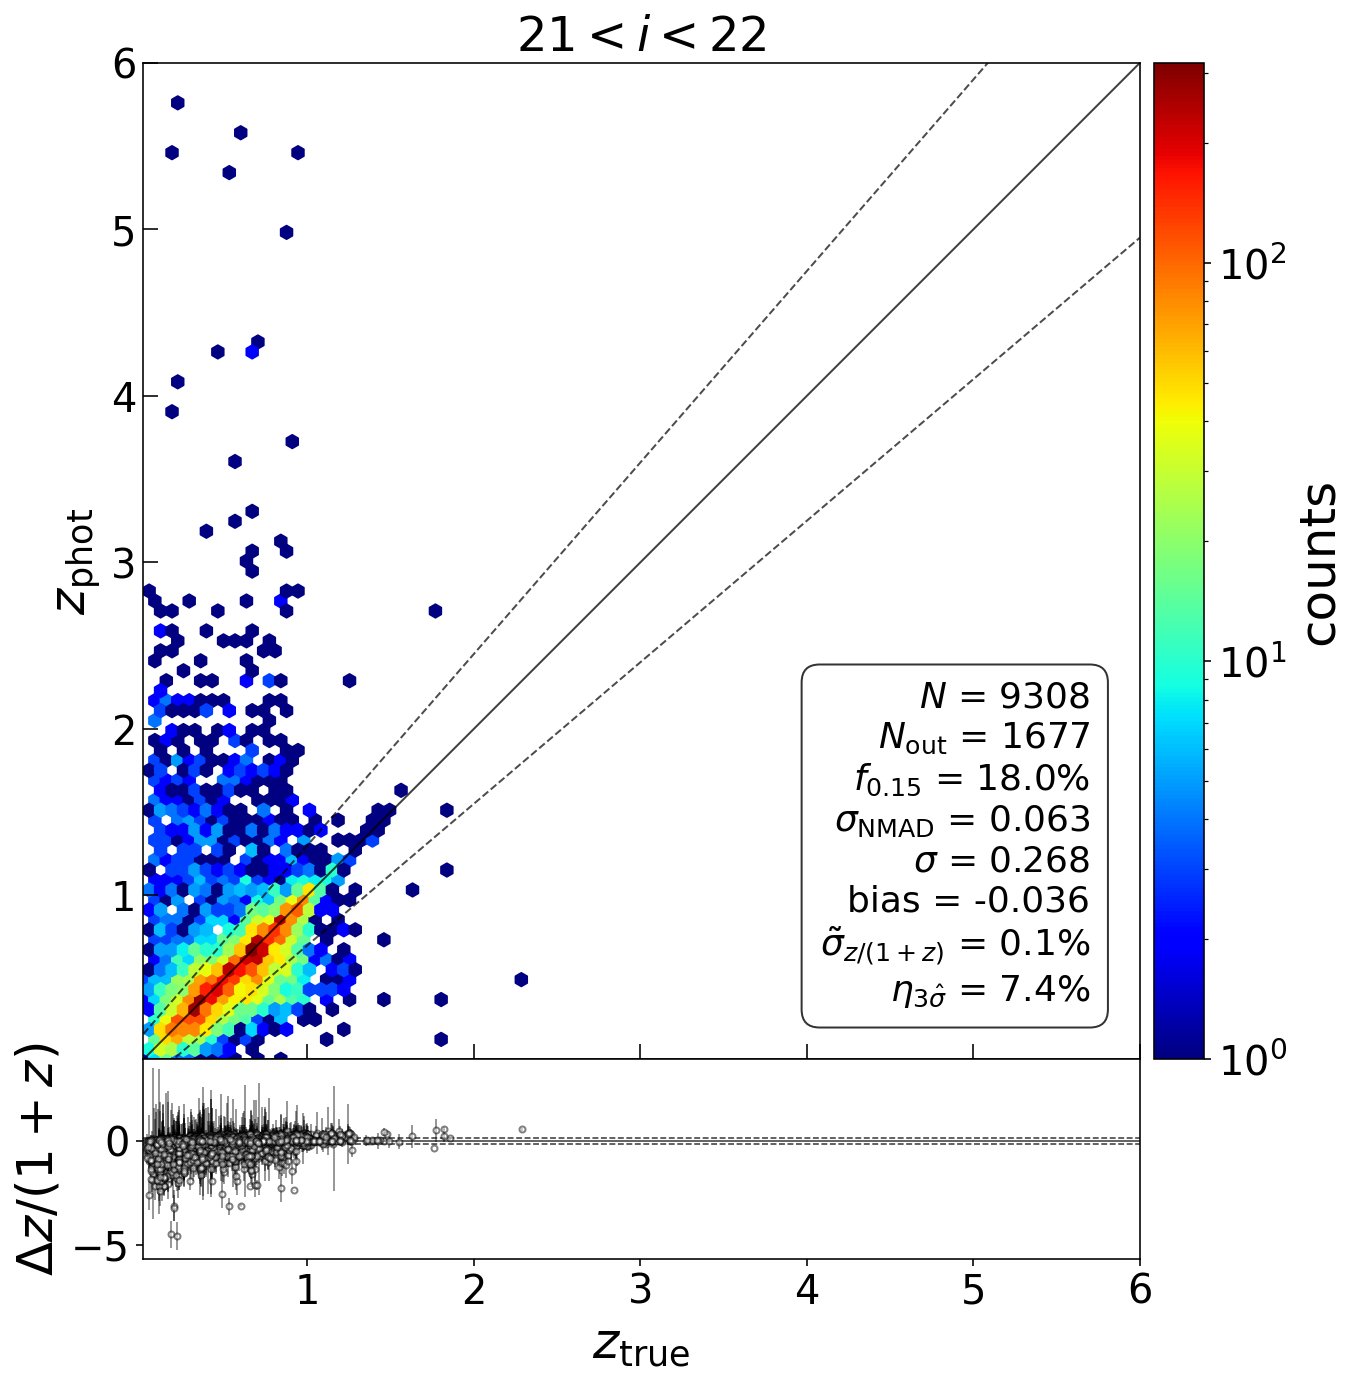

In [67]:
imask = (base['HSC_i_MAG'] > 21) & (base['HSC_i_MAG'] < 22)

# id_out = plot_comp_hexbin(base['z_true'][imask], base['z_phot'][imask],
#                           base['z_phot_chi2'][imask],
#                           'Fig1-comp_z_eazypy.png', base['id'][imask],
#                           label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
#                           title="$21<i<22$", xmin=0.015, xmax=5.8, cmap='jet',
#                           scatter_plot=False, gridsize=(87,50), log_scale=False)
id_out = plot_comp_hexbin(base['z_true'][imask], base['z_phot'][imask],
                          base['z_phot_chi2'][imask],
                          'Fig1-comp_z_eazypy.png', base['id'][imask],
                          z_160=base['z160'][imask], z_840=base['z840'][imask],
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title="$21<i<22$", xmin=0.015, xmax=6, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False,
                          residual_plot=True)

Objects : 21178
Outliers: 10648




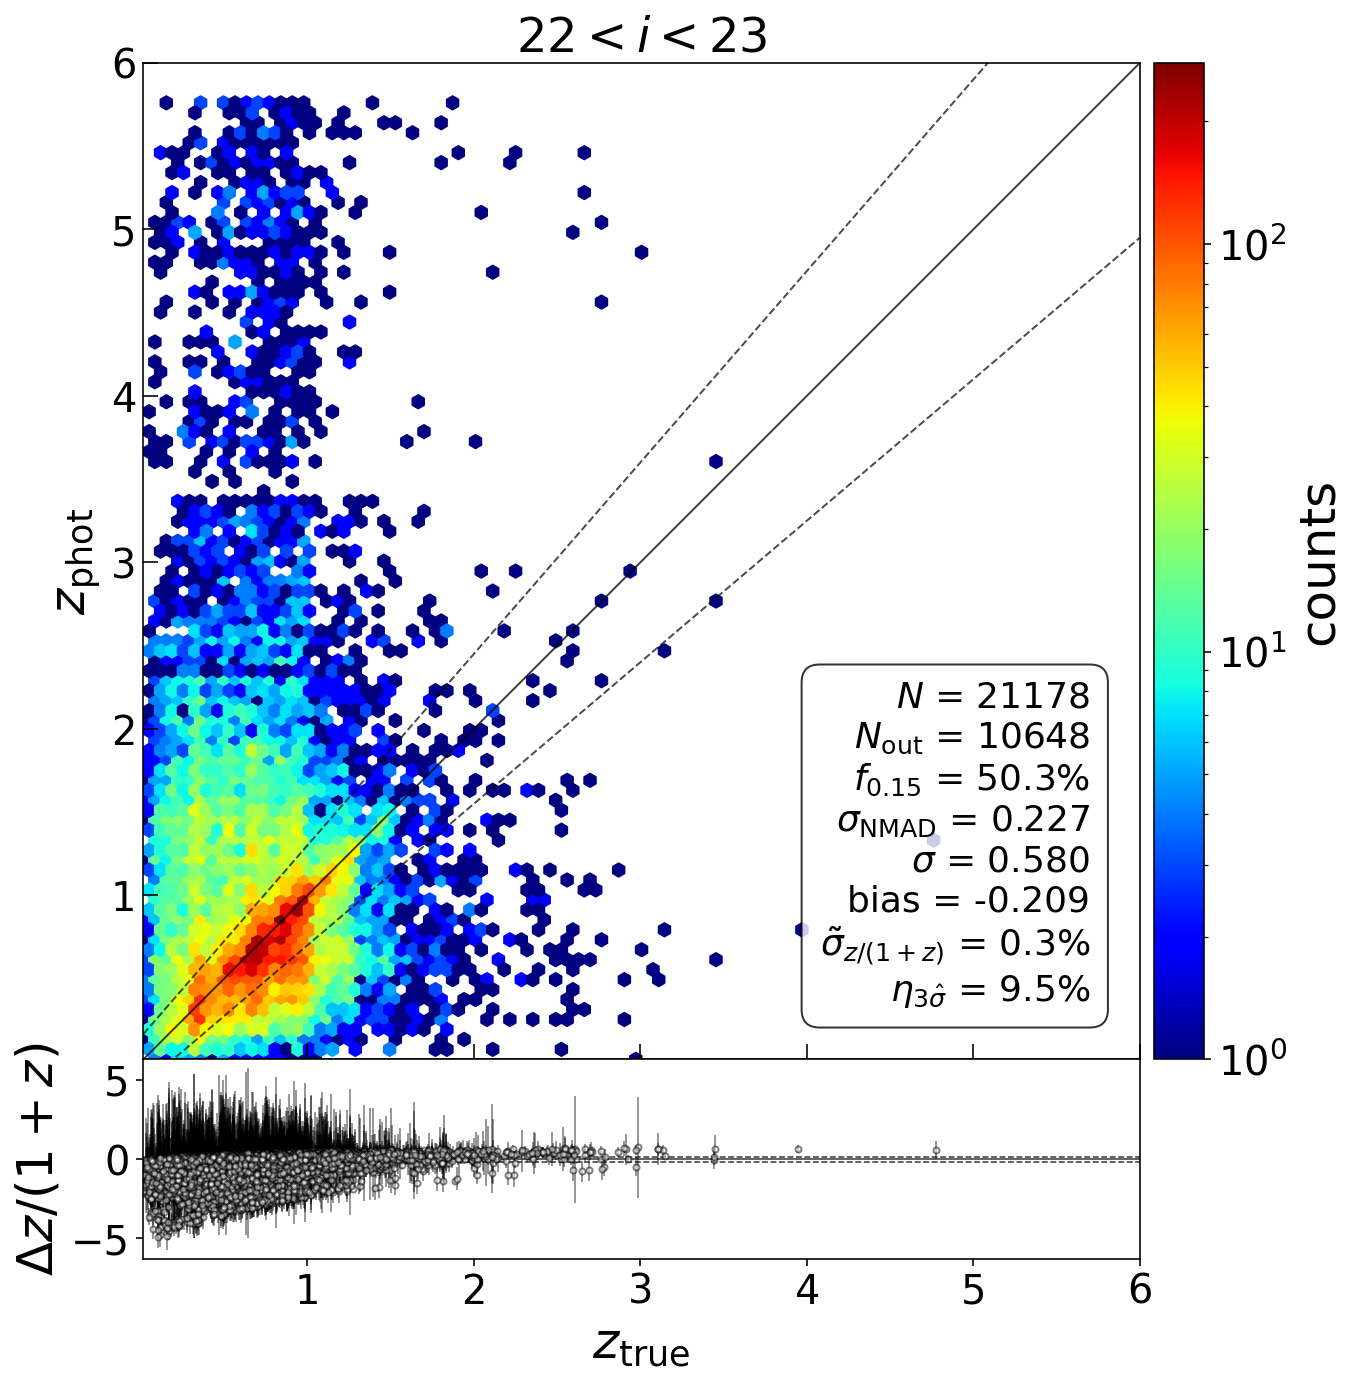

In [68]:
imask = (base['HSC_i_MAG'] > 22) & (base['HSC_i_MAG'] < 23)

# id_out = plot_comp_hexbin(base['z_true'][imask], base['z_phot'][imask],
#                           base['z_phot_chi2'][imask],
#                           'Fig1-comp_z_eazypy.png', base['id'][imask],
#                           label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
#                           title="$22<i<23$", xmin=0.015, xmax=5.8, cmap='jet',
#                           scatter_plot=False, gridsize=(87,50), log_scale=False)
id_out = plot_comp_hexbin(base['z_true'][imask], base['z_phot'][imask],
                          base['z_phot_chi2'][imask],
                          'Fig1-comp_z_eazypy.png', base['id'][imask],
                          z_160=base['z160'][imask], z_840=base['z840'][imask],
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title="$22<i<23$", xmin=0.015, xmax=6, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False,
                          residual_plot=True)

Objects : 128234
Outliers: 96854




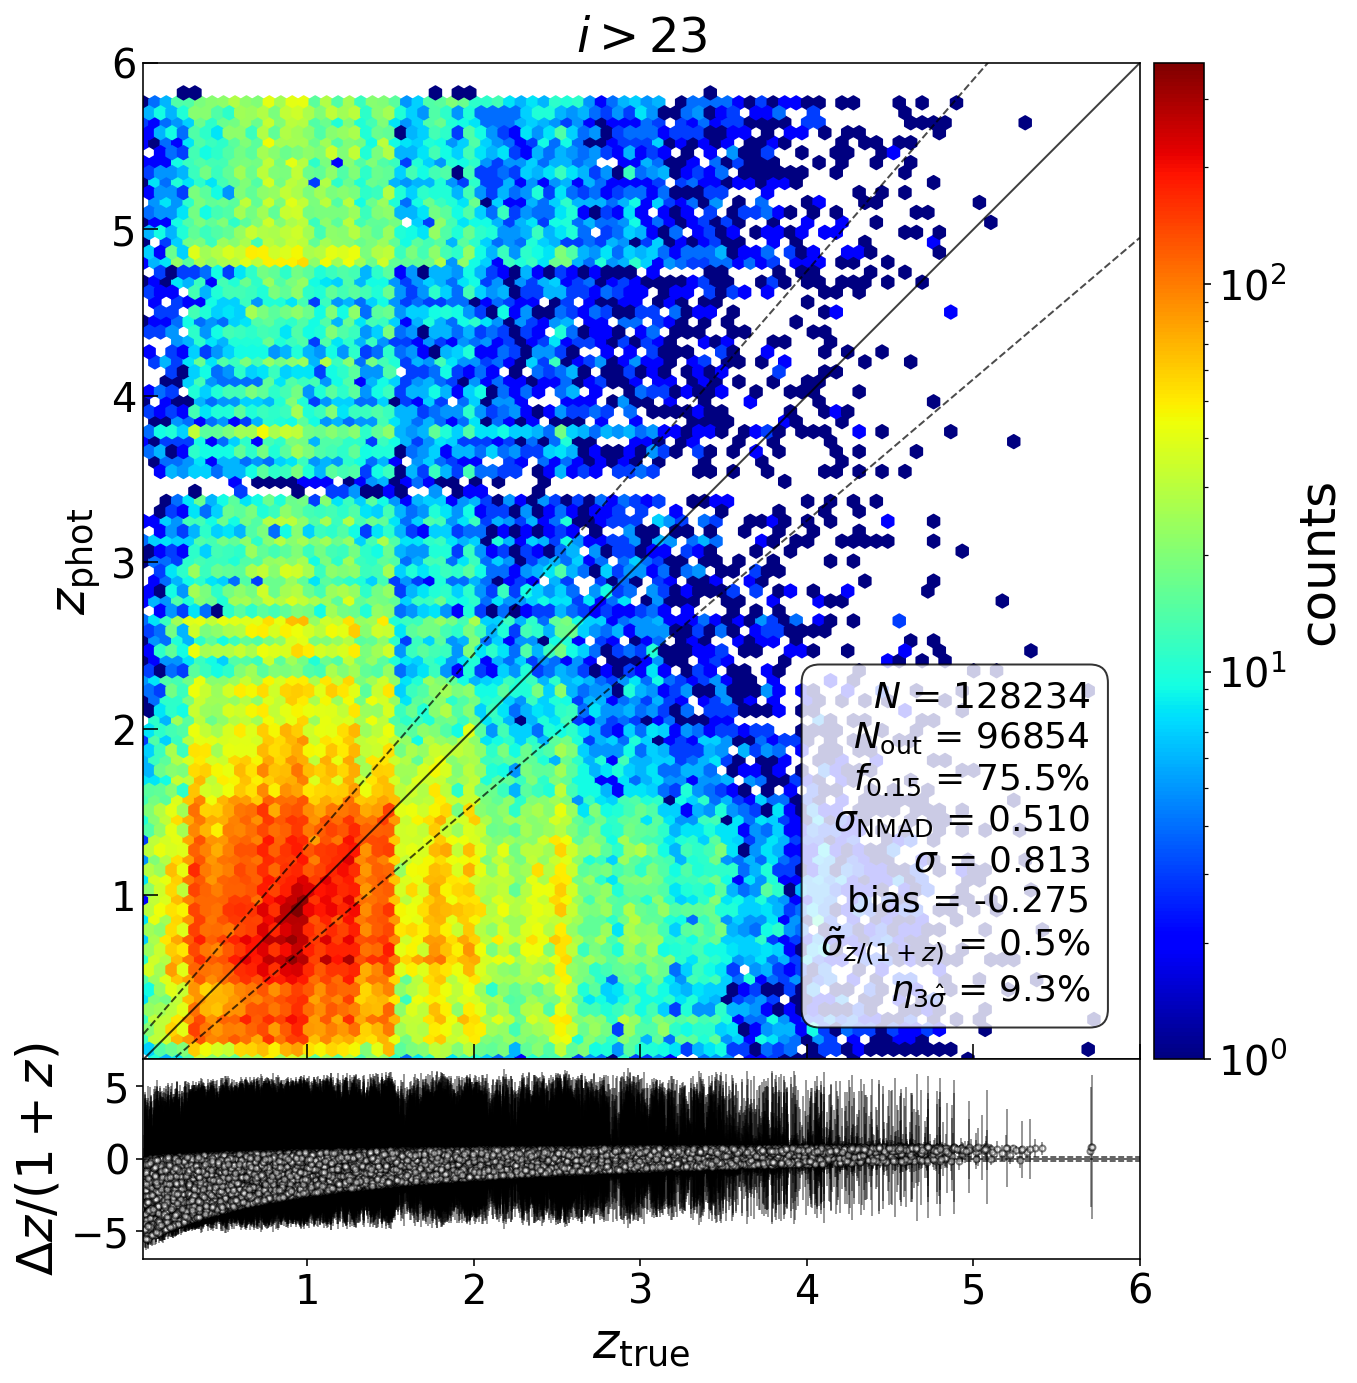

In [69]:
imask = (base['HSC_i_MAG'] > 23)

# id_out = plot_comp_hexbin(base['z_true'][imask], base['z_phot'][imask],
#                           base['z_phot_chi2'][imask],
#                           'Fig1-comp_z_eazypy.png', base['id'][imask],
#                           label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
#                           title="$i>23$", xmin=0.015, xmax=5.8, cmap='jet',
#                           scatter_plot=False, gridsize=(87,50), log_scale=False)
id_out = plot_comp_hexbin(base['z_true'][imask], base['z_phot'][imask],
                          base['z_phot_chi2'][imask],
                          'Fig1-comp_z_eazypy.png', base['id'][imask],
                          z_160=base['z160'][imask], z_840=base['z840'][imask],
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title="$i>23$", xmin=0.015, xmax=6, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False,
                          residual_plot=True)

/tmp/ipykernel_3541967/4039205289.py:2: RuntimeWarning: divide by zero encountered in divide
  np.max([base["z840"] - base["z_phot"], base["z_phot"] - base["z160"]], axis=0)


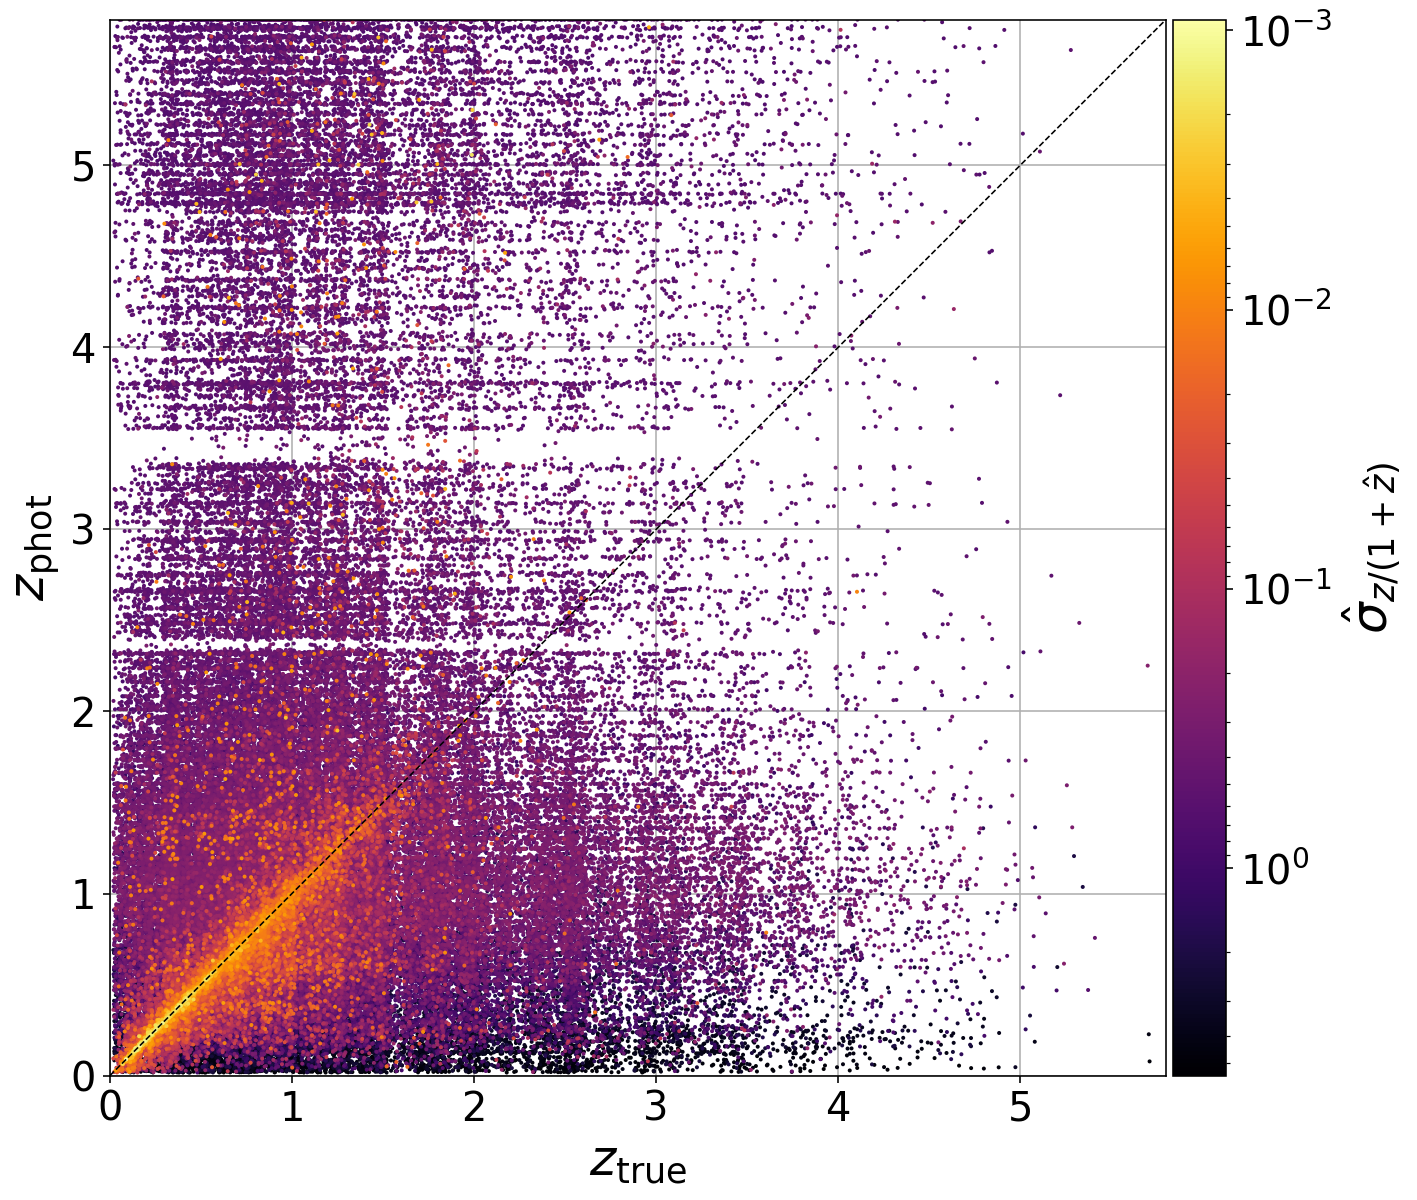

In [39]:
sigz = (
    np.max([base["z840"] - base["z_phot"], base["z_phot"] - base["z160"]], axis=0)
    / (1 + base["z_phot"])
)
idxs = np.argsort(sigz)[::-1]
x, y, s = base['z_true'][idxs], base['z_phot'][idxs], sigz[idxs]
sigzmask = (s > 0)

from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
sc = ax.scatter(x[sigzmask], y[sigzmask], c=s[sigzmask], s=1, cmap='inferno_r',
                norm=LogNorm())
ax.plot([0, 5.8], [0, 5.8], color='k', lw=0.8, ls='--')
ax.set_xlim(0, 5.8)
ax.set_ylim(0, 5.8)
ax.set_aspect('equal')
ax.set_xlabel(r'$z_{\rm true}$')
ax.set_ylabel(r'$z_{\rm phot}$')
ax.set_axisbelow(True)
ax.grid()

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(sc, cax=cax)
cax.invert_yaxis()
cbar.set_label(r'$\hat{\sigma}_{z/(1+\hat{z})}$')

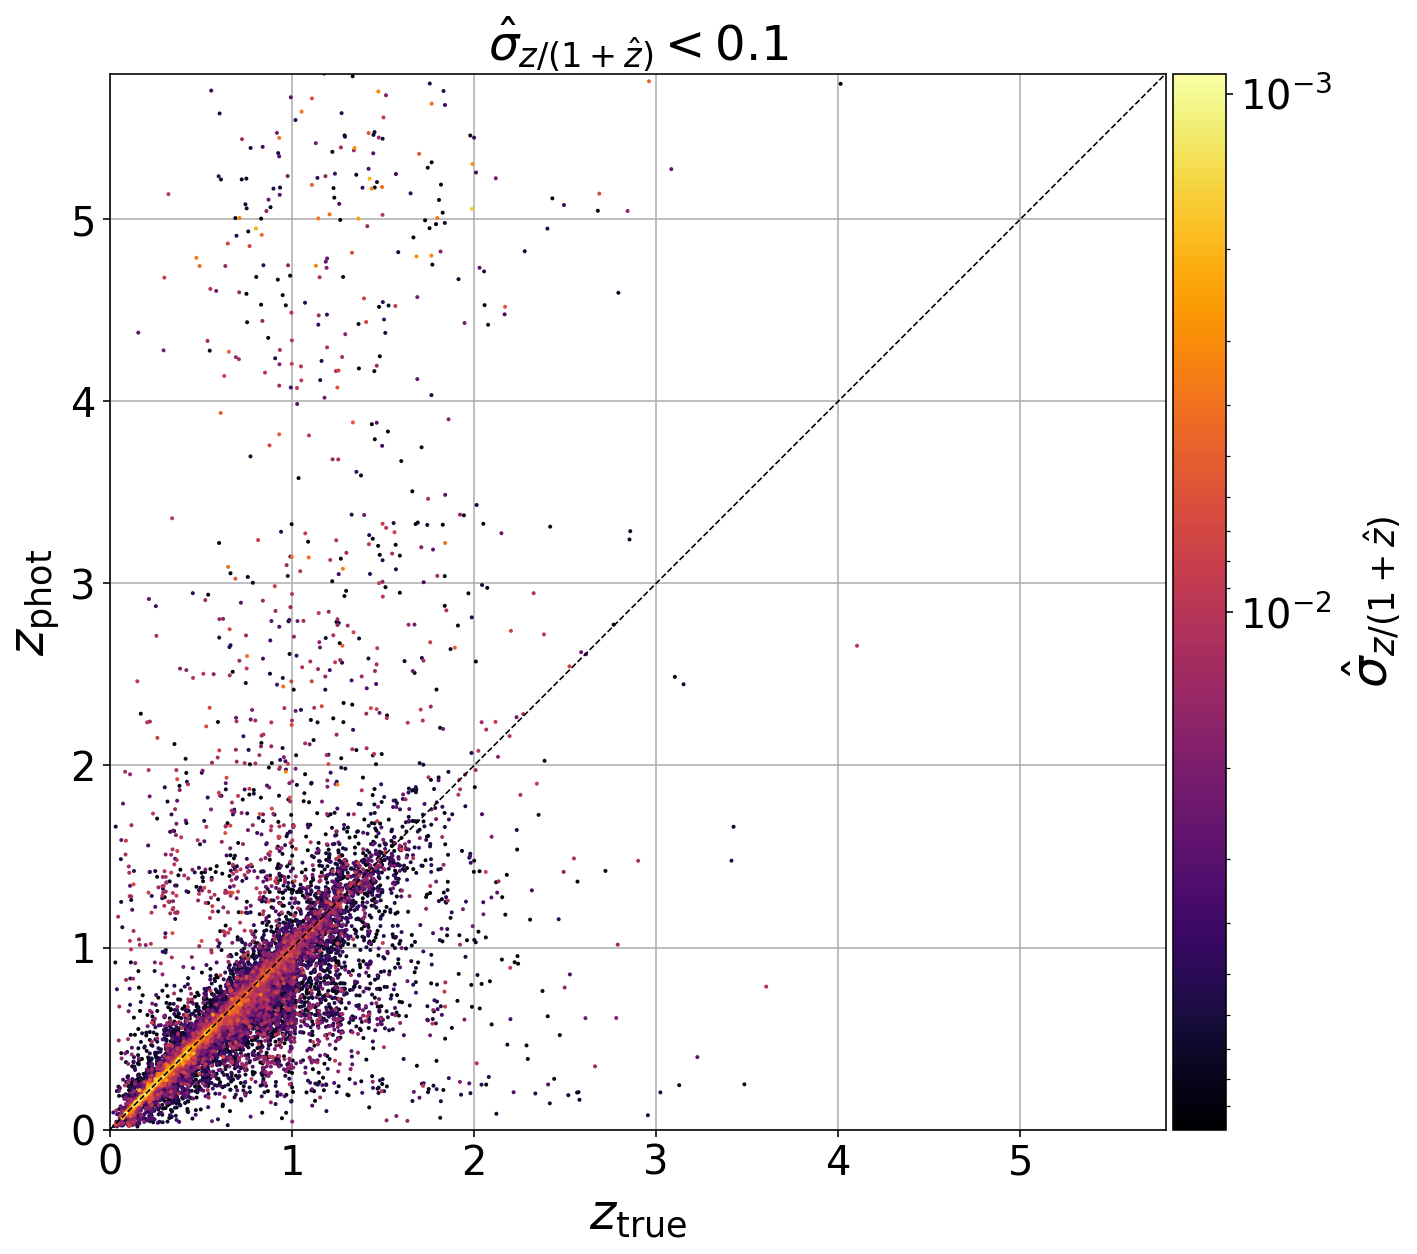

In [40]:
sigzmask = (s < 0.1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
sc = ax.scatter(x[sigzmask], y[sigzmask], c=s[sigzmask], s=1, cmap='inferno_r',
                norm=LogNorm())
ax.plot([0, 5.8], [0, 5.8], color='k', lw=0.8, ls='--')
ax.set_xlim(0, 5.8)
ax.set_ylim(0, 5.8)
ax.set_aspect('equal')
ax.set_xlabel(r'$z_{\rm true}$')
ax.set_ylabel(r'$z_{\rm phot}$')
ax.set_axisbelow(True)
ax.grid()
ax.set_title(r'$\hat{\sigma}_{z/(1+\hat{z})} < 0.1$')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(sc, cax=cax)
cax.invert_yaxis()
cbar.set_label(r'$\hat{\sigma}_{z/(1+\hat{z})}$')

Objects : 18748
Outliers: 2458




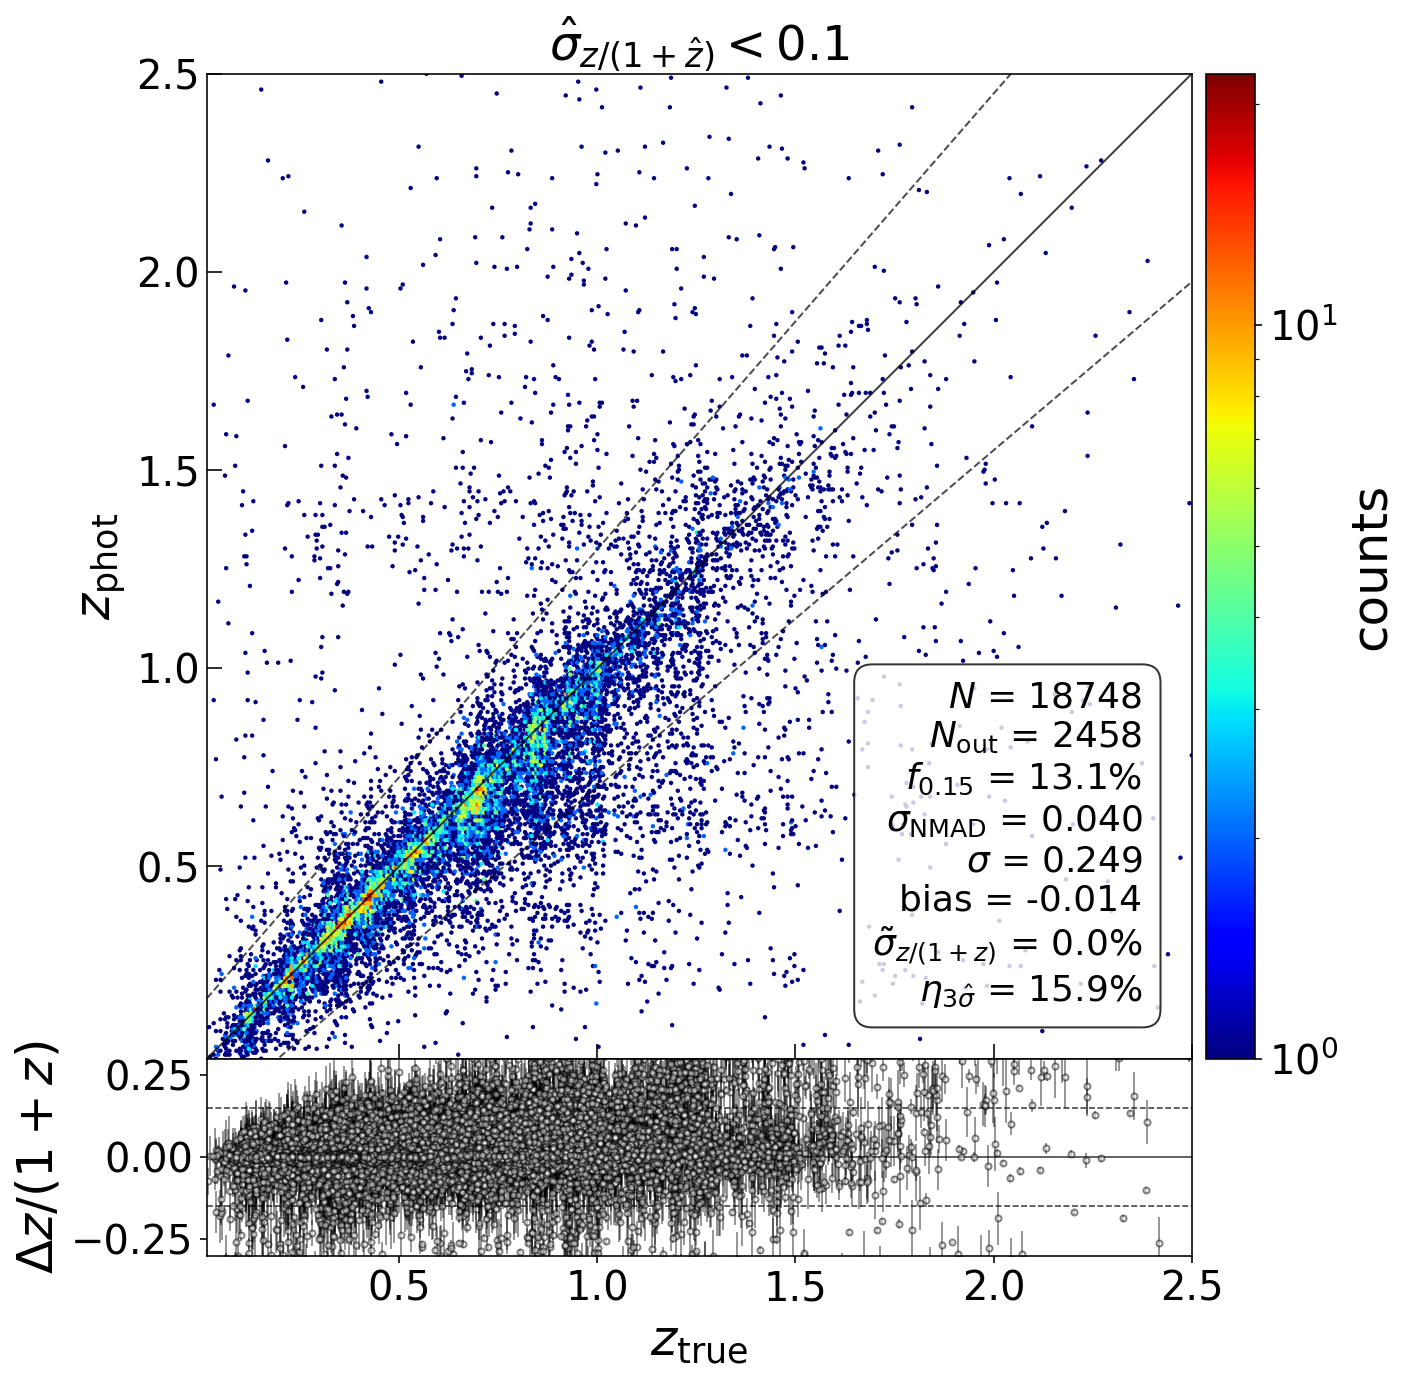

In [72]:
sigzmask = (s < 0.1)

id_out = plot_comp_hexbin(x[sigzmask], y[sigzmask],
                          np.ones_like(x[sigzmask]),
                          'Fig1-comp_z_eazypy.png', np.arange(len(x[sigzmask])),
                          z_840=base['z840'][idxs][sigzmask], z_160=base['z160'][idxs][sigzmask],
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=r'$\hat{\sigma}_{z/(1+\hat{z})} < 0.1$',
                          xmin=0.015, xmax=2.5, cmap='jet',
                          scatter_plot=False, gridsize=(87*5,50*5), log_scale=False,
                          residual_plot=True, residual_ylim=(-0.3, 0.3))

Objects : 2542
Outliers: 188




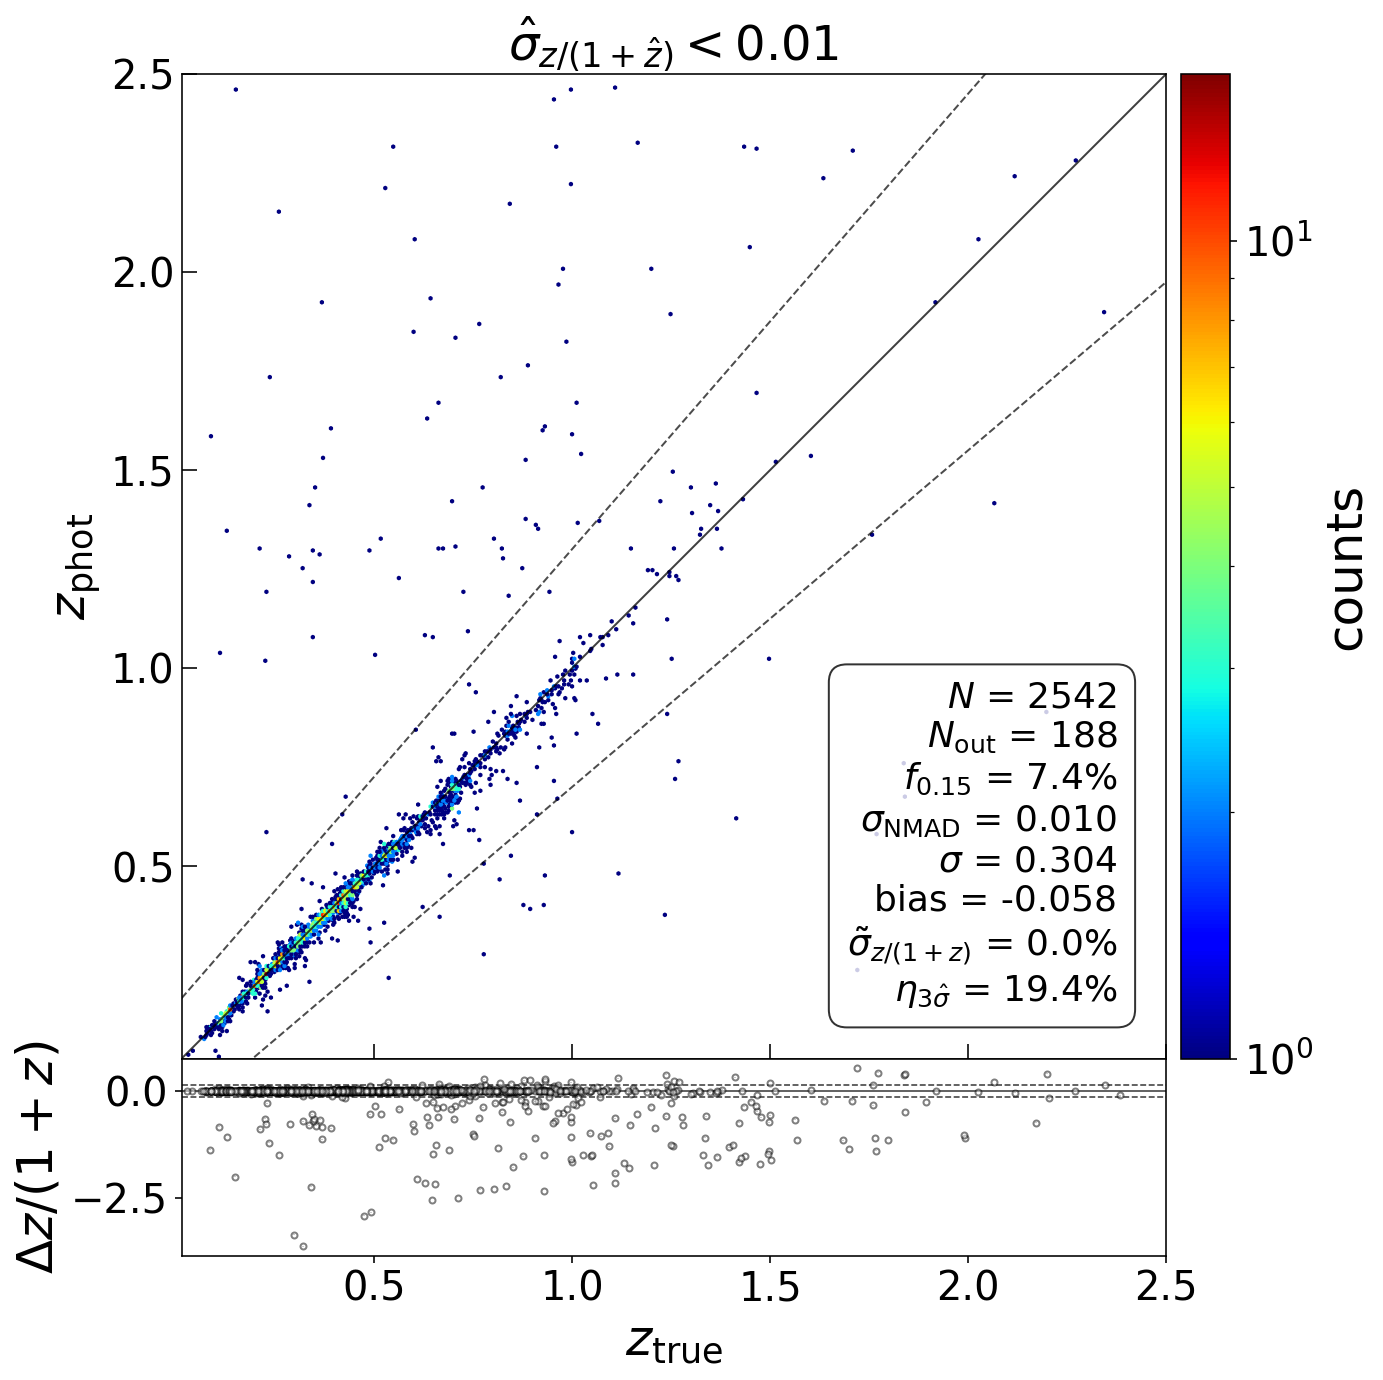

In [75]:
sigzmask = (s < 0.01)

id_out = plot_comp_hexbin(x[sigzmask], y[sigzmask],
                          np.ones_like(x[sigzmask]),
                          'Fig1-comp_z_eazypy.png', np.arange(len(x[sigzmask])),
                          z_840=base['z840'][idxs][sigzmask], z_160=base['z160'][idxs][sigzmask],
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=r'$\hat{\sigma}_{z/(1+\hat{z})} < 0.01$',
                          xmin=0.015, xmax=2.5, cmap='jet',
                          scatter_plot=False, gridsize=(87*5,50*5), log_scale=False,
                          residual_plot=True, residual_ylim=None)

Objects : 1011
Outliers: 47




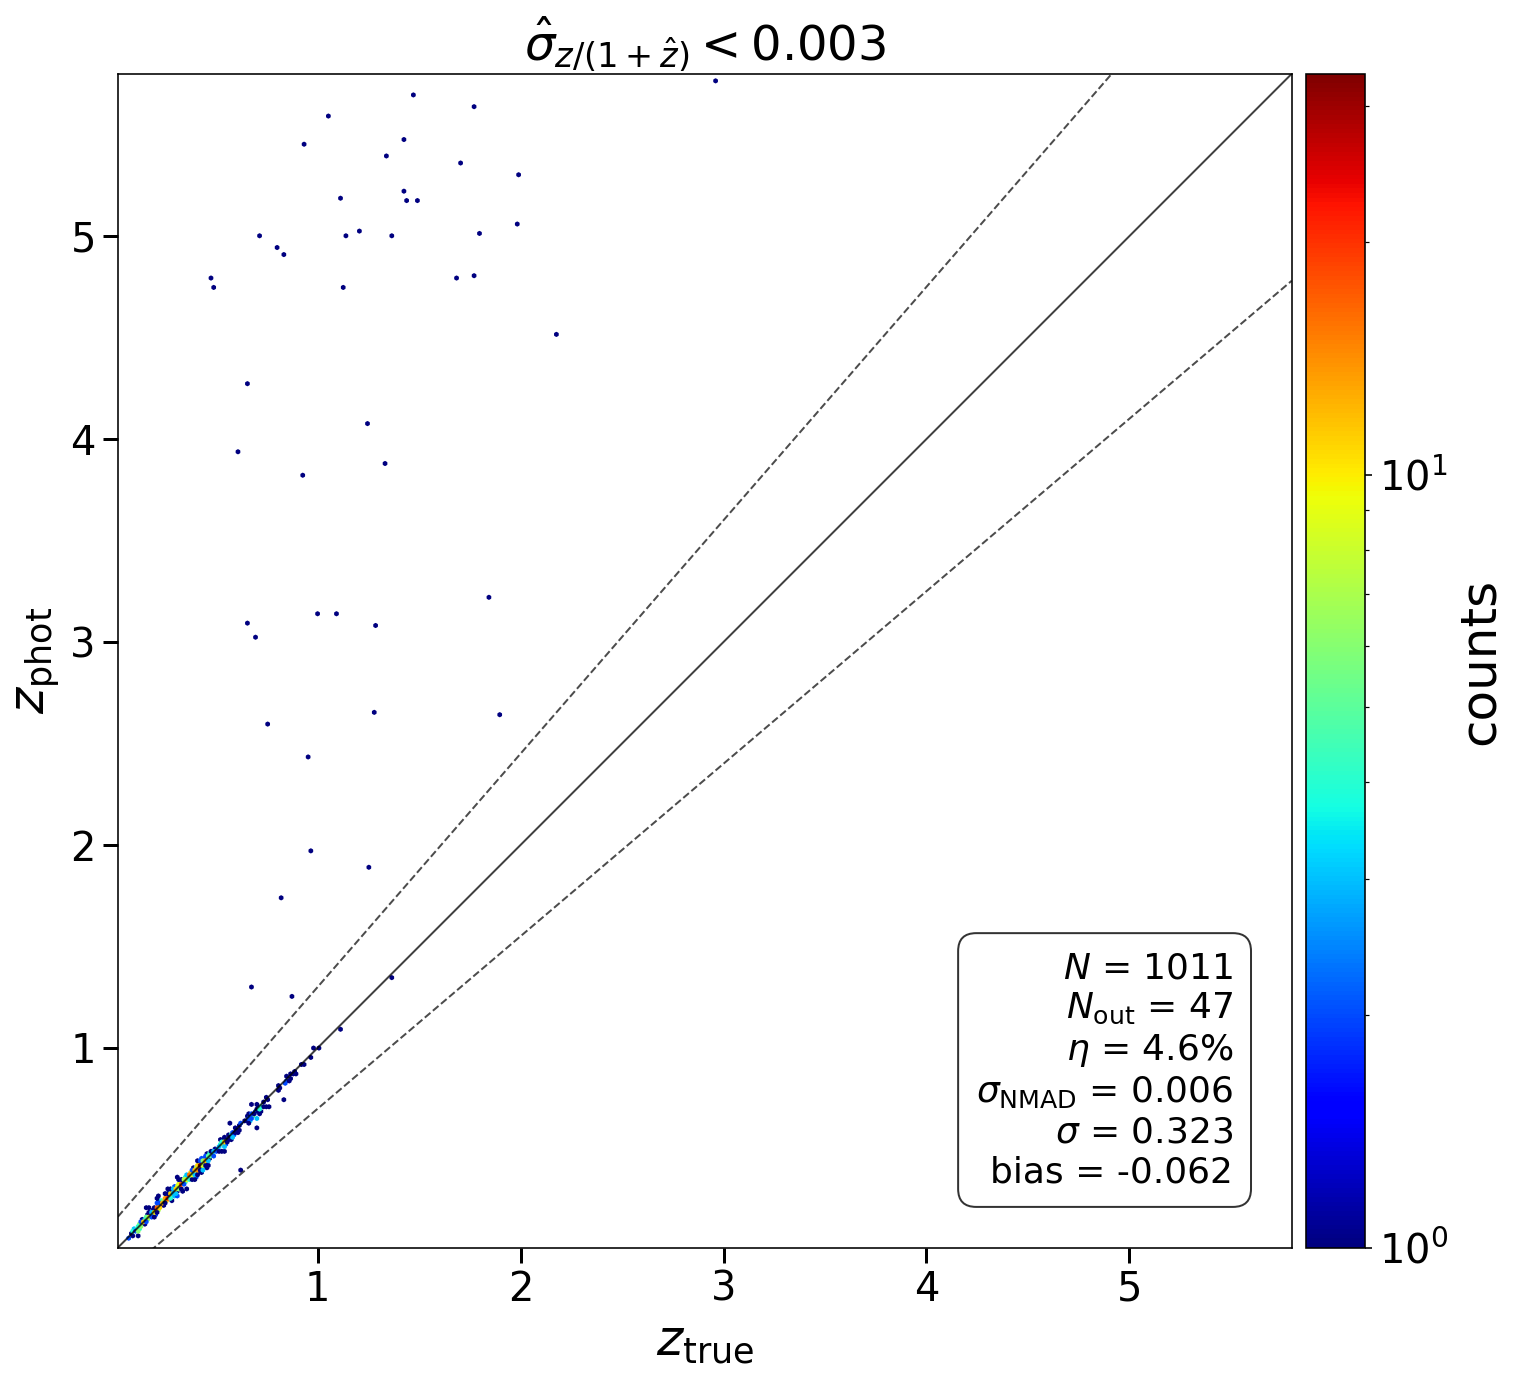

In [29]:
sigzmask = (s < 0.003)

id_out = plot_comp_hexbin(x[sigzmask], y[sigzmask],
                          np.ones_like(x[sigzmask]),
                          'Fig1-comp_z_eazypy.png', np.arange(len(x[sigzmask])),
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=r'$\hat{\sigma}_{z/(1+\hat{z})} < 0.003$',
                          xmin=0.015, xmax=5.8, cmap='jet',
                          scatter_plot=False, gridsize=(87*5,50*5), log_scale=False)